###### Importing Libraries

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import Sequential

###### Loading Dataset and normalizing pixel values between 0 to 1

In [2]:
(train_X, train_Y), (validation_X, validation_Y) = cifar10.load_data()
train_X, validation_X = train_X/255.0, validation_X/255.0         #Normalizing values between 0 to 1 rather than 0 to 255.
print("The shape of training set is :",train_X.shape)
print("The shape of Validation set is :",validation_X.shape)
#Using test set as validation.

The shape of training set is : (50000, 32, 32, 3)
The shape of Validation set is : (10000, 32, 32, 3)


###### There are 60,000 32x32 (pixels) colored images in CIFAR-10 dataset. It has 10 classes. Out of those 60,000 images, 50,000 are used as training dataset and 10,000 as testing dataset. As asked in question, we will randomly split the training set in 20-80 ratio and use the new Randomly sample 20% of the training set as our new training set. Also will use the 10,000 images in the testing set as validation set.

In [3]:
#10 classes are described below:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

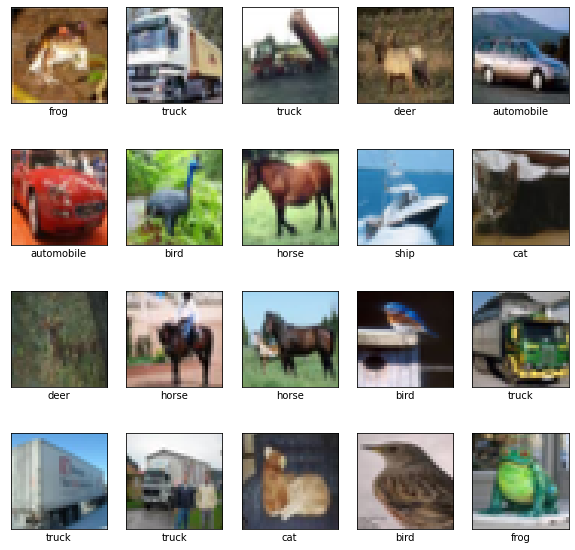

In [4]:
#Generating the plot to verify the dataset.
plt.figure(figsize=(10,10))
for j in range(20):
    plt.subplot(4,5,j+1)
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(train_X[j])
    plt.xlabel(class_names[train_Y[j][0]])
plt.show()

In [5]:
#Randomly Spltting the train set in 80-20 ratio and will use the 20% as new train set.
train_X1,test_X1,train_Y1,test_Y = train_test_split(train_X,train_Y,train_size = 0.2,random_state = 42)

In [6]:
print("After split the shape of train set is:",train_X1.shape)

After split the shape of train set is: (10000, 32, 32, 3)


## 1) MLP

MUlti-layer perceptron is have 2 fully connected layer with 512 neurons each and is using sigmoid as activation function

In [7]:
model_mlp = models.Sequential()
model_mlp.add(layers.Flatten(input_shape=(32, 32, 3)))
#Using Flatten layer to convert 3D data to 1D
model_mlp.add(layers.Dense(512,activation = 'sigmoid'))
model_mlp.add(layers.Dense(512,activation = 'sigmoid'))
model_mlp.add(layers.Dense(10,activation = 'softmax'))
#Using 10 neurons as output in last dense layer as we have 10 classes. 
#Using a softmax function as an activation function because it can perform multiclass classification 
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Fitting the model using 32 batch size and 5 epoch as asked in question.
history_mlp = model_mlp.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

Epoch 1/5
313/313 [==============================] - 4s 12ms/step - loss: 2.0404 - accuracy: 0.2440 - val_loss: 1.9381 - val_accuracy: 0.2789
Epoch 2/5
313/313 [==============================] - 4s 12ms/step - loss: 1.8972 - accuracy: 0.3081 - val_loss: 1.8689 - val_accuracy: 0.3264
Epoch 3/5
313/313 [==============================] - 4s 12ms/step - loss: 1.8366 - accuracy: 0.3320 - val_loss: 1.8025 - val_accuracy: 0.3439
Epoch 4/5
313/313 [==============================] - 4s 12ms/step - loss: 1.7969 - accuracy: 0.3446 - val_loss: 1.8246 - val_accuracy: 0.3427
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 1.7557 - accuracy: 0.3616 - val_loss: 1.7650 - val_accuracy: 0.3667


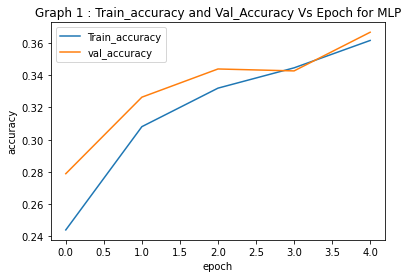

In [30]:
plt.plot(history_mlp.history['accuracy'], label = 'Train_accuracy')
plt.plot(history_mlp.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Graph 1 : Train_accuracy and Val_Accuracy Vs Epoch for MLP')
plt.legend(loc = 'upper left')
plt.show()

#### 1.1) MLP Changing layer

In [10]:
layer_acc =[]                      
layer_val_acc = []

print("                1 Hidden Layer                  ")
layer1=models.Sequential()
layer1.add(layers.Flatten(input_shape=(32, 32, 3)))
layer1.add(layers.Dense(512,activation = 'sigmoid'))
layer1.add(layers.Dense(10,activation = 'softmax'))
layer1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1 = layer1.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))
loss,accuracy = layer1.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = layer1.evaluate(validation_X,validation_Y)
layer_acc.append(accuracy)                 
layer_val_acc.append(val_accuracy)

                1 Hidden Layer                  
Epoch 1/5
313/313 [==============================] - 4s 11ms/step - loss: 2.0638 - accuracy: 0.2529 - val_loss: 1.8933 - val_accuracy: 0.3291
Epoch 2/5
313/313 [==============================] - 3s 10ms/step - loss: 1.8839 - accuracy: 0.3233 - val_loss: 1.8595 - val_accuracy: 0.3271
Epoch 3/5
313/313 [==============================] - 3s 10ms/step - loss: 1.8206 - accuracy: 0.3450 - val_loss: 1.8729 - val_accuracy: 0.3296
Epoch 4/5
313/313 [==============================] - 3s 10ms/step - loss: 1.7840 - accuracy: 0.3604 - val_loss: 1.7994 - val_accuracy: 0.3613
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.7434 - accuracy: 0.3750


In [11]:
print("                 2 Hidden Layer             ")
layer2=models.Sequential()
layer2.add(layers.Flatten(input_shape=(32, 32, 3)))
layer2.add(layers.Dense(512,activation = 'sigmoid'))
layer2.add(layers.Dense(512,activation = 'sigmoid'))
layer2.add(layers.Dense(10,activation = 'softmax'))
layer2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1 = layer2.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))
loss,accuracy = layer2.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = layer2.evaluate(validation_X,validation_Y)
layer_acc.append(accuracy)
layer_val_acc.append(val_accuracy)

                 2 Hidden Layer             
Epoch 1/5
313/313 [==============================] - 4s 12ms/step - loss: 2.0797 - accuracy: 0.2304 - val_loss: 1.9529 - val_accuracy: 0.2868
Epoch 2/5
313/313 [==============================] - 4s 12ms/step - loss: 1.9295 - accuracy: 0.2965 - val_loss: 1.9660 - val_accuracy: 0.2776
Epoch 3/5
313/313 [==============================] - 4s 12ms/step - loss: 1.8684 - accuracy: 0.3222 - val_loss: 1.9339 - val_accuracy: 0.2824
Epoch 4/5
313/313 [==============================] - 4s 12ms/step - loss: 1.8150 - accuracy: 0.3375 - val_loss: 1.8178 - val_accuracy: 0.3661
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7926 - accuracy: 0.3473


In [12]:
print("                  3 Hidden Layer               ")
layer3=models.Sequential()
layer3.add(layers.Flatten(input_shape=(32, 32, 3)))
layer3.add(layers.Dense(512,activation = 'sigmoid'))
layer3.add(layers.Dense(512,activation = 'sigmoid'))
layer3.add(layers.Dense(512,activation = 'sigmoid'))
layer3.add(layers.Dense(10,activation = 'softmax'))
layer3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1 = layer3.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))
loss,accuracy = layer3.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = layer3.evaluate(validation_X,validation_Y)
layer_acc.append(accuracy)
layer_val_acc.append(val_accuracy)

                  3 Hidden Layer               
Epoch 1/5
313/313 [==============================] - 5s 15ms/step - loss: 2.1510 - accuracy: 0.1872 - val_loss: 1.9841 - val_accuracy: 0.2638
Epoch 2/5
313/313 [==============================] - 5s 15ms/step - loss: 1.9725 - accuracy: 0.2693 - val_loss: 1.9580 - val_accuracy: 0.2695
Epoch 3/5
313/313 [==============================] - 5s 15ms/step - loss: 1.9100 - accuracy: 0.2982 - val_loss: 1.8692 - val_accuracy: 0.3091
Epoch 4/5
313/313 [==============================] - 5s 15ms/step - loss: 1.8759 - accuracy: 0.3130 - val_loss: 1.9283 - val_accuracy: 0.2924
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.9107 - accuracy: 0.3227


In [13]:
print("                  4 Hidden Layer               ")
layer4=models.Sequential()
layer4.add(layers.Flatten(input_shape=(32, 32, 3)))
layer4.add(layers.Dense(512,activation = 'sigmoid'))
layer4.add(layers.Dense(512,activation = 'sigmoid'))
layer4.add(layers.Dense(512,activation = 'sigmoid'))
layer4.add(layers.Dense(512,activation = 'sigmoid'))
layer4.add(layers.Dense(10,activation = 'softmax'))
layer4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1 = layer4.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))
loss,accuracy = layer4.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = layer4.evaluate(validation_X,validation_Y)
layer_acc.append(accuracy)
layer_val_acc.append(val_accuracy)

                  4 Hidden Layer               
Epoch 1/5
313/313 [==============================] - 5s 16ms/step - loss: 2.1818 - accuracy: 0.1554 - val_loss: 2.1458 - val_accuracy: 0.1751
Epoch 2/5
313/313 [==============================] - 5s 16ms/step - loss: 2.0893 - accuracy: 0.1838 - val_loss: 2.1068 - val_accuracy: 0.1903
Epoch 3/5
313/313 [==============================] - 6s 19ms/step - loss: 2.0335 - accuracy: 0.2308 - val_loss: 1.9930 - val_accuracy: 0.2286
Epoch 4/5
313/313 [==============================] - 7s 23ms/step - loss: 1.9558 - accuracy: 0.2680 - val_loss: 1.9233 - val_accuracy: 0.2846
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8851 - accuracy: 0.2906


In [14]:
print("                  5 Hidden Layer               ")
layer5=models.Sequential()
layer5.add(layers.Flatten(input_shape=(32, 32, 3)))
layer5.add(layers.Dense(512,activation = 'sigmoid'))
layer5.add(layers.Dense(512,activation = 'sigmoid'))
layer5.add(layers.Dense(512,activation = 'sigmoid'))
layer5.add(layers.Dense(512,activation = 'sigmoid'))
layer5.add(layers.Dense(512,activation = 'sigmoid'))
layer5.add(layers.Dense(10,activation = 'softmax'))
layer5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h1 = layer5.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))
loss,accuracy = layer5.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = layer5.evaluate(validation_X,validation_Y)
layer_acc.append(accuracy)
layer_val_acc.append(val_accuracy)

                  5 Hidden Layer               
Epoch 1/5
313/313 [==============================] - 9s 26ms/step - loss: 2.2248 - accuracy: 0.1450 - val_loss: 2.0944 - val_accuracy: 0.1638
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 2.1039 - accuracy: 0.1726 - val_loss: 2.1755 - val_accuracy: 0.1701
Epoch 3/5
313/313 [==============================] - 7s 23ms/step - loss: 2.0964 - accuracy: 0.1806 - val_loss: 2.0638 - val_accuracy: 0.2017
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 2.0765 - accuracy: 0.1755 - val_loss: 2.0595 - val_accuracy: 0.2017
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 2.0575 - accuracy: 0.1903


In [15]:
print("Training Accuracy with 1,2,3,4,5 Hidden Layer is :\n",layer_acc)
print("\nValidation Accuracy with 1,2,3,4,5 Hidden Layer is : \n:", layer_val_acc)

Training Accuracy with 1,2,3,4,5 Hidden Layer is :
 [0.400299996137619, 0.36090001463890076, 0.33059999346733093, 0.2980000078678131, 0.1914999932050705]

Validation Accuracy with 1,2,3,4,5 Hidden Layer is : 
: [0.375, 0.3472999930381775, 0.32269999384880066, 0.2906000018119812, 0.19030000269412994]


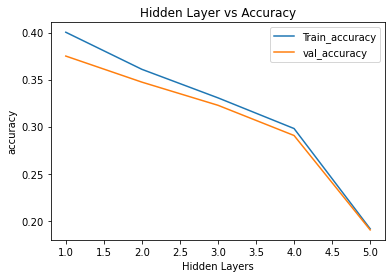

In [16]:
plt.plot([1,2,3,4,5],layer_acc, label = 'Train_accuracy')
plt.plot([1,2,3,4,5],layer_val_acc,label = 'val_accuracy')
plt.title('Hidden Layer vs Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layers')
plt.legend(loc = 'upper right')
plt.show()

###### We can see the accuracy of both training and validation set is reducing with increase in number of hidden layer.

#### 1.2) Changing the number of neurons per layer in the MLP

Keeping the Hidden layer fix to 2 and, will change the number of neurons.

In [17]:
neurons_acc = []
neurons_val_acc = []



print("                 64 Neurons                  ")
n1 = models.Sequential()
n1.add(layers.Flatten(input_shape=(32, 32, 3)))
n1.add(layers.Dense(64,activation = 'sigmoid'))
n1.add(layers.Dense(64,activation = 'sigmoid'))
n1.add(layers.Dense(10,activation = 'softmax'))
n1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h2 = n1.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

loss,accuracy = n1.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = n1.evaluate(validation_X,validation_Y)
neurons_acc.append(accuracy)
neurons_val_acc.append(val_accuracy)


                 64 Neurons                  
Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 2.2012 - accuracy: 0.1712 - val_loss: 2.0859 - val_accuracy: 0.1783
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 2.0417 - accuracy: 0.2364 - val_loss: 1.9890 - val_accuracy: 0.2864
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 1.9716 - accuracy: 0.2751 - val_loss: 1.9864 - val_accuracy: 0.2716
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 1.9284 - accuracy: 0.3055 - val_loss: 1.9108 - val_accuracy: 0.3042
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.9030 - accuracy: 0.3091


In [18]:
print("                 128 Neurons                  ")
n2 = models.Sequential()
n2.add(layers.Flatten(input_shape=(32, 32, 3)))
n2.add(layers.Dense(128,activation = 'sigmoid'))
n2.add(layers.Dense(128,activation = 'sigmoid'))
n2.add(layers.Dense(10,activation = 'softmax'))
n2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h2 = n2.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

loss,accuracy = n2.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = n2.evaluate(validation_X,validation_Y)
neurons_acc.append(accuracy)
neurons_val_acc.append(val_accuracy)

                 128 Neurons                  
Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 2.1217 - accuracy: 0.2125 - val_loss: 1.9981 - val_accuracy: 0.2463
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 1.9475 - accuracy: 0.2957 - val_loss: 1.9192 - val_accuracy: 0.2882
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8782 - accuracy: 0.3238 - val_loss: 1.8587 - val_accuracy: 0.3358
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 1.8521 - accuracy: 0.3313 - val_loss: 1.8605 - val_accuracy: 0.3179
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8280 - accuracy: 0.3349


In [19]:
print("                 256 Neurons                  ")
n3 = models.Sequential()
n3.add(layers.Flatten(input_shape=(32, 32, 3)))
n3.add(layers.Dense(256,activation = 'sigmoid'))
n3.add(layers.Dense(256,activation = 'sigmoid'))
n3.add(layers.Dense(10,activation = 'softmax'))
n3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h2 = n3.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

loss,accuracy = n3.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = n3.evaluate(validation_X,validation_Y)
neurons_acc.append(accuracy)
neurons_val_acc.append(val_accuracy)

                 256 Neurons                  
Epoch 1/5
313/313 [==============================] - 2s 7ms/step - loss: 2.0708 - accuracy: 0.2282 - val_loss: 1.9350 - val_accuracy: 0.2882
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 1.9106 - accuracy: 0.3052 - val_loss: 1.8871 - val_accuracy: 0.3205
Epoch 3/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8567 - accuracy: 0.3261 - val_loss: 1.8633 - val_accuracy: 0.3150
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8140 - accuracy: 0.3424 - val_loss: 1.8015 - val_accuracy: 0.3454
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.8994 - accuracy: 0.3372


In [20]:
print("                 512 Neurons                  ")
n4 = models.Sequential()
n4.add(layers.Flatten(input_shape=(32, 32, 3)))
n4.add(layers.Dense(512,activation = 'sigmoid'))
n4.add(layers.Dense(512,activation = 'sigmoid'))
n4.add(layers.Dense(10,activation = 'softmax'))
n4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h4 = n4.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

loss,accuracy = n4.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = n4.evaluate(validation_X,validation_Y)
neurons_acc.append(accuracy)
neurons_val_acc.append(val_accuracy)

                 512 Neurons                  
Epoch 1/5
313/313 [==============================] - 5s 15ms/step - loss: 2.0765 - accuracy: 0.2388 - val_loss: 1.9422 - val_accuracy: 0.2988
Epoch 2/5
313/313 [==============================] - 5s 15ms/step - loss: 1.9226 - accuracy: 0.3021 - val_loss: 1.8554 - val_accuracy: 0.3151
Epoch 3/5
313/313 [==============================] - 4s 14ms/step - loss: 1.8621 - accuracy: 0.3202 - val_loss: 1.8200 - val_accuracy: 0.3410
Epoch 4/5
313/313 [==============================] - 5s 15ms/step - loss: 1.8130 - accuracy: 0.3414 - val_loss: 1.8207 - val_accuracy: 0.3271
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 1.7781 - accuracy: 0.3545


In [21]:
print("                 1024 Neurons                  ")
n5 = models.Sequential()
n5.add(layers.Flatten(input_shape=(32, 32, 3)))
n5.add(layers.Dense(1024,activation = 'sigmoid'))
n5.add(layers.Dense(1024,activation = 'sigmoid'))
n5.add(layers.Dense(10,activation = 'softmax'))
n5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h5 = n5.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

loss,accuracy = n5.evaluate(train_X1,train_Y1)
val_loss,val_accuracy = n5.evaluate(validation_X,validation_Y)
neurons_acc.append(accuracy)
neurons_val_acc.append(val_accuracy)

                 1024 Neurons                  
Epoch 1/5
313/313 [==============================] - 9s 27ms/step - loss: 2.1244 - accuracy: 0.2189 - val_loss: 1.9910 - val_accuracy: 0.2602
Epoch 2/5
313/313 [==============================] - 9s 29ms/step - loss: 1.9364 - accuracy: 0.2947 - val_loss: 1.9259 - val_accuracy: 0.2988
Epoch 3/5
313/313 [==============================] - 9s 29ms/step - loss: 1.8861 - accuracy: 0.3141 - val_loss: 1.8367 - val_accuracy: 0.3424
Epoch 4/5
313/313 [==============================] - 9s 28ms/step - loss: 1.8236 - accuracy: 0.3367 - val_loss: 1.8688 - val_accuracy: 0.2920
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8821 - accuracy: 0.2986


In [22]:
print("The impact of changing neurons 64,128,256,512,1024 on Train_Accuracy is :\n",neurons_acc)
print("\nThe impact of changing neurons 64,128,256,512,1024 on Validation_Accuracy is :\n",neurons_val_acc)

The impact of changing neurons 64,128,256,512,1024 on Train_Accuracy is :
 [0.326200008392334, 0.3529999852180481, 0.34869998693466187, 0.37059998512268066, 0.3093999922275543]

The impact of changing neurons 64,128,256,512,1024 on Validation_Accuracy is :
 [0.3091000020503998, 0.33489999175071716, 0.33719998598098755, 0.3544999957084656, 0.2985999882221222]


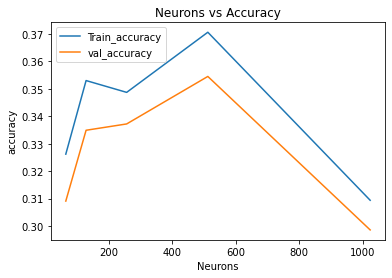

In [23]:
plt.plot([64,128,256,512,1024],neurons_acc, label = 'Train_accuracy')
plt.plot([64,128,256,512,1024],neurons_val_acc,label = 'val_accuracy')
plt.title('Neurons vs Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Neurons')
plt.legend(loc = 'upper left')
plt.show()

###### As we can see we are getting highest  highest accuracy at 512 neurons so that's why it is better choice here.

## 2) CNN1

###### CNN1 has 2  Conv Layer which has 64 filters, size of 3*3 and relu activation function each. The shape of input is (image_height, image_width, color_channels). There are 3 color_channels that refer to R, G and B (R=Red, G=Green, B=Blue), so the input shape is (32,32,3). before Applying dense layer we will flatten the 3D data to 1D and the will apply 2 dense laye with 512 neurons and sigmoid activation function each. the last dense layer has 10 output as we have 10 classes in CIFAR-10 Dataset.

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
#Using Flatten layer to convert 3D data to 1D
model.add(layers.Dense(512,activation = 'sigmoid'))
model.add(layers.Dense(512,activation = 'sigmoid'))
model.add(layers.Dense(10,activation = 'softmax'))
#Using 10 neurons as output in last dense layer as we have 10 classes. 
#Using a softmax function as an activation function because it can perform multiclass classification 
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_11 (Flatten)        (None, 50176)             0         
                                                                 
 dense_38 (Dense)            (None, 512)               25690624  
                                                                 
 dense_39 (Dense)            (None, 512)               262656    
                                                                 
 dense_40 (Dense)            (None, 10)                5130      
                                                                 
Total params: 25,997,130
Trainable params: 25,997,130

###### We will now compile and train the model 

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Fitting the model using 32 batch size and 5 epoch as asked in question.
history = model.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

Epoch 1/5
313/313 [==============================] - 74s 237ms/step - loss: 1.8120 - accuracy: 0.3364 - val_loss: 1.5723 - val_accuracy: 0.4170
Epoch 2/5
313/313 [==============================] - 72s 231ms/step - loss: 1.4066 - accuracy: 0.4851 - val_loss: 1.3705 - val_accuracy: 0.5038
Epoch 3/5
313/313 [==============================] - 75s 241ms/step - loss: 1.1284 - accuracy: 0.5906 - val_loss: 1.3121 - val_accuracy: 0.5369
Epoch 4/5
313/313 [==============================] - 75s 238ms/step - loss: 0.8165 - accuracy: 0.7098 - val_loss: 1.3921 - val_accuracy: 0.5324
Epoch 5/5
313/313 [==============================] - 76s 242ms/step - loss: 0.4584 - accuracy: 0.8542 - val_loss: 1.4876 - val_accuracy: 0.5492


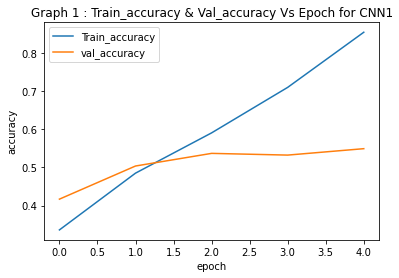

In [26]:
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Graph 1 : Train_accuracy & Val_accuracy Vs Epoch for CNN1')
plt.legend(loc = 'upper left')
plt.show()

As we can see the accuracy is getting better with each epoch.

# CNN2

In [27]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Flatten())        #Flattening 3D to 1D
model2.add(layers.Dense(512,activation = 'sigmoid'))
model2.add(Dropout(0.2))            # Using DropOut with 0.2 dropout rate to avoid Overfitting
model2.add(layers.Dense(512,activation = 'sigmoid'))
model2.add(Dropout(0.2))
model2.add(layers.Dense(10,activation = 'softmax'))   #Using 10 as output because we have 10 Classes.
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 2304)              0         
                                                                 
 dense_41 (Dense)            (None, 512)             

In [28]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_X1, train_Y1, batch_size = 32, epochs=5, validation_data=(validation_X, validation_Y))

Epoch 1/5
313/313 [==============================] - 16s 49ms/step - loss: 1.9852 - accuracy: 0.2665 - val_loss: 1.6275 - val_accuracy: 0.4066
Epoch 2/5
313/313 [==============================] - 16s 52ms/step - loss: 1.6217 - accuracy: 0.4057 - val_loss: 1.5122 - val_accuracy: 0.4471
Epoch 3/5
313/313 [==============================] - 16s 51ms/step - loss: 1.4608 - accuracy: 0.4704 - val_loss: 1.4391 - val_accuracy: 0.4717
Epoch 4/5
313/313 [==============================] - 17s 53ms/step - loss: 1.3466 - accuracy: 0.5124 - val_loss: 1.3270 - val_accuracy: 0.5155
Epoch 5/5
313/313 [==============================] - 16s 52ms/step - loss: 1.2393 - accuracy: 0.5477 - val_loss: 1.2427 - val_accuracy: 0.5529


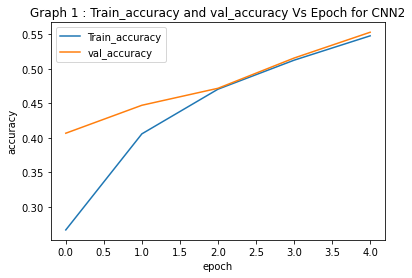

In [29]:
plt.plot(history2.history['accuracy'], label = 'Train_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Graph 1 : Train_accuracy and val_accuracy Vs Epoch for CNN2')
plt.legend(loc = 'upper left')
plt.show()